In [26]:
# Importamos librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [4]:
# Configuraciones visuales
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [12]:
# Cargue de datos
df = pd.read_csv("credit_risk_dataset.csv")

In [13]:
# Vista inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

Dimensiones del dataset: (32581, 12)

Primeras filas:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [14]:
# 3. Información general del dataset
print("\n--- Información general ---")
df.info()

print("\n--- Resumen estadístico ---")
display(df.describe(include='all'))

# Conteo de valores nulos
print("\n--- Valores nulos por variable ---")
display(df.isnull().sum())

# Porcentaje de valores faltantes
missing_percent = df.isnull().mean() * 100
print("\n--- Porcentaje de valores faltantes ---")
display(missing_percent.sort_values(ascending=False))


--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB

-

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000



--- Valores nulos por variable ---


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


--- Porcentaje de valores faltantes ---


loan_int_rate                 9.563856
person_emp_length             2.747000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [15]:
# 4. Limpieza básica

# Manejo de valores nulos
df = df.dropna()

In [22]:
df.shape

(28638, 12)

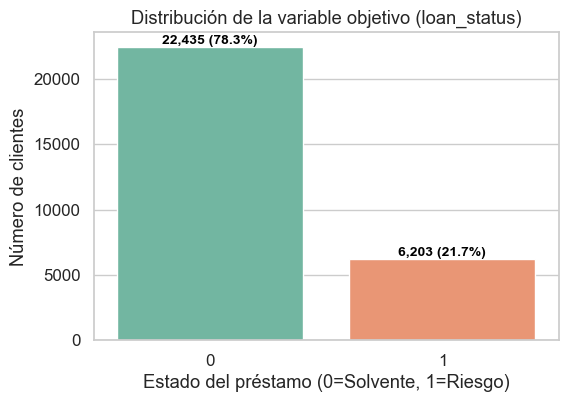

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

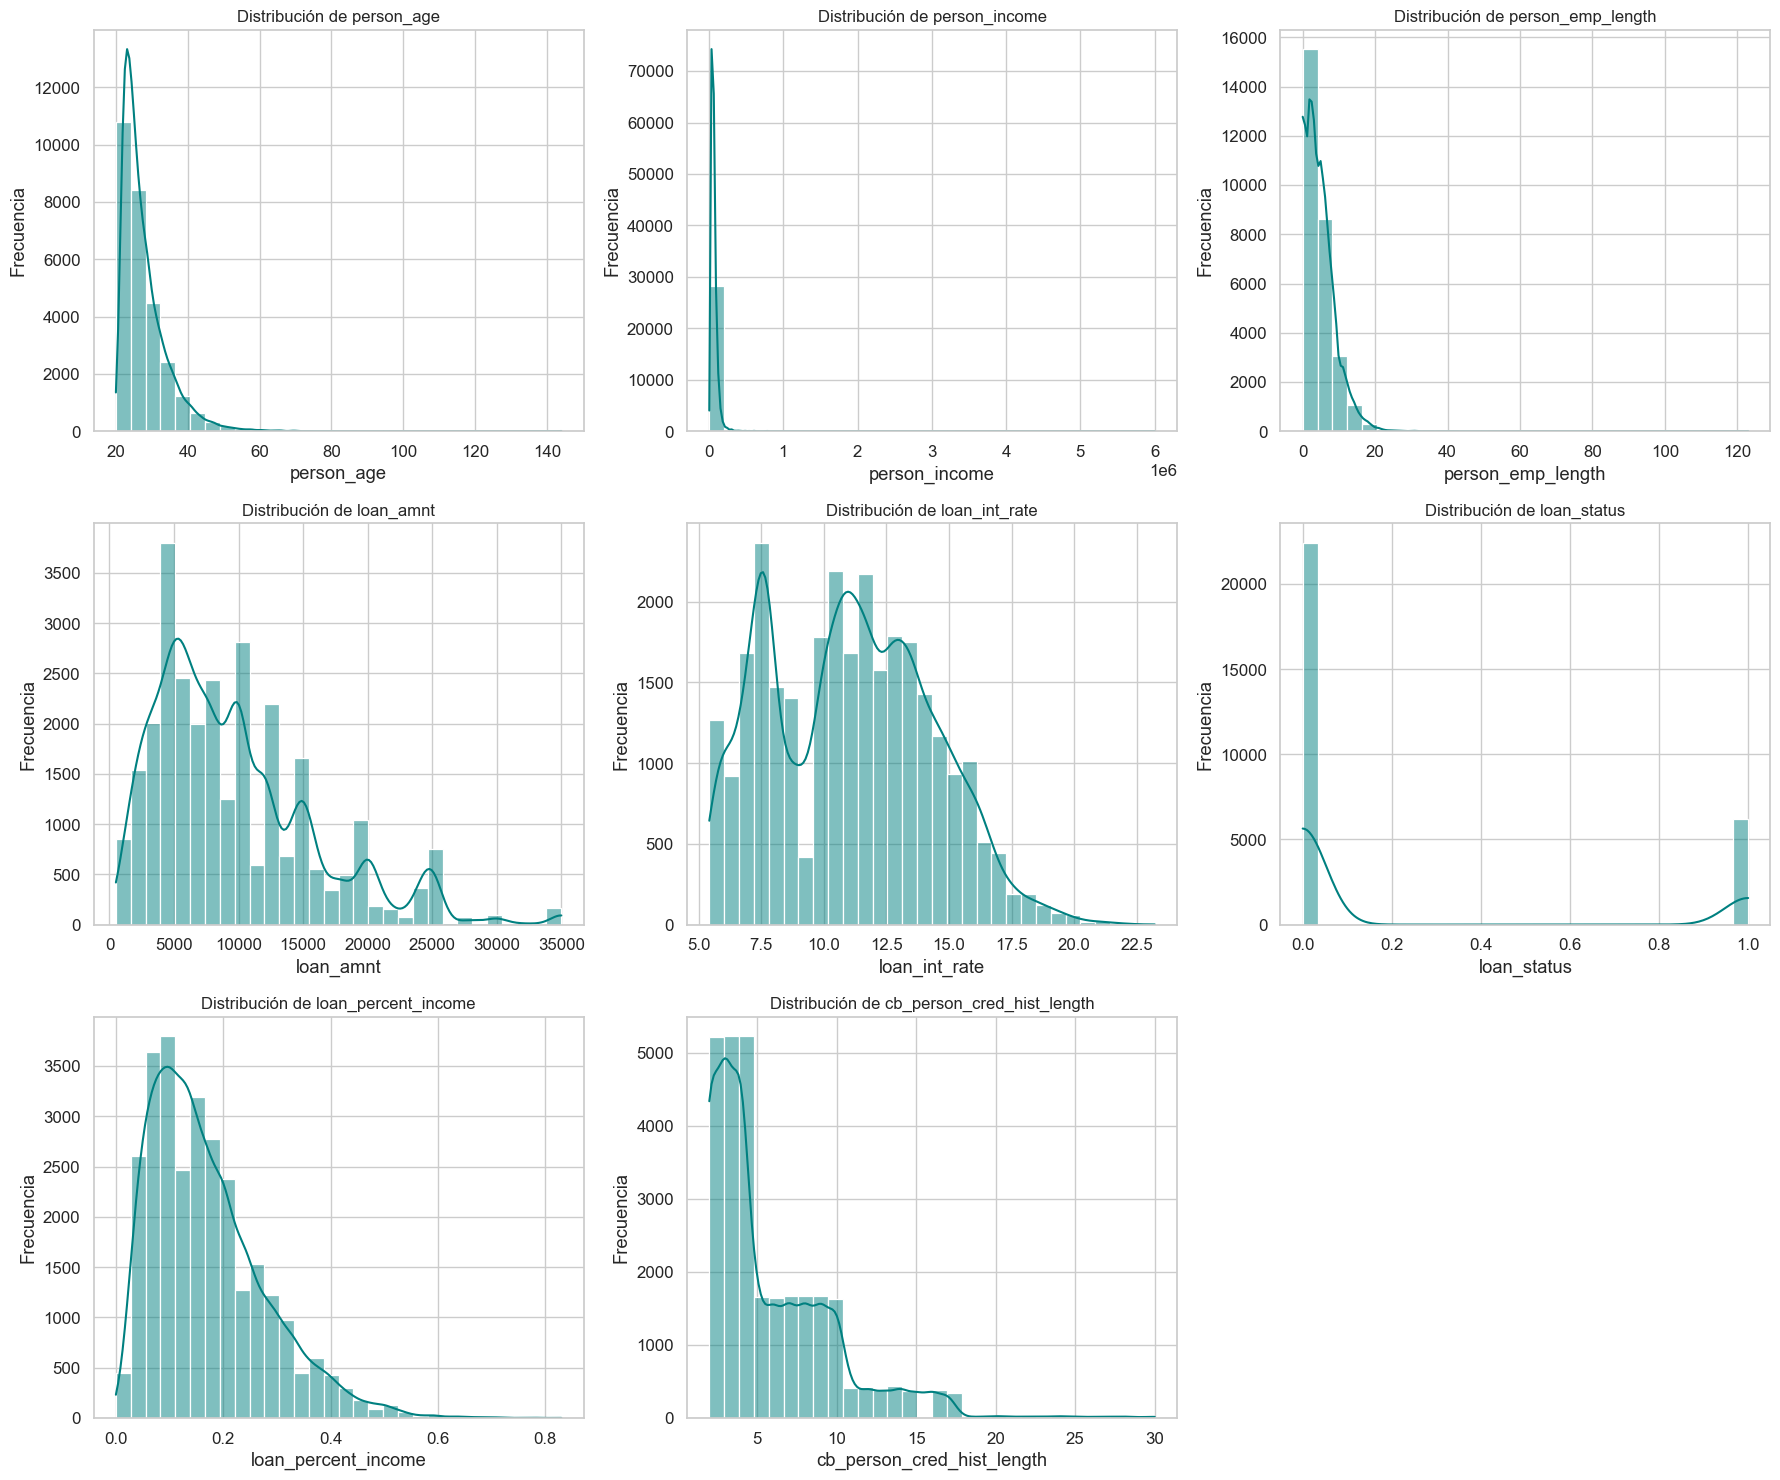

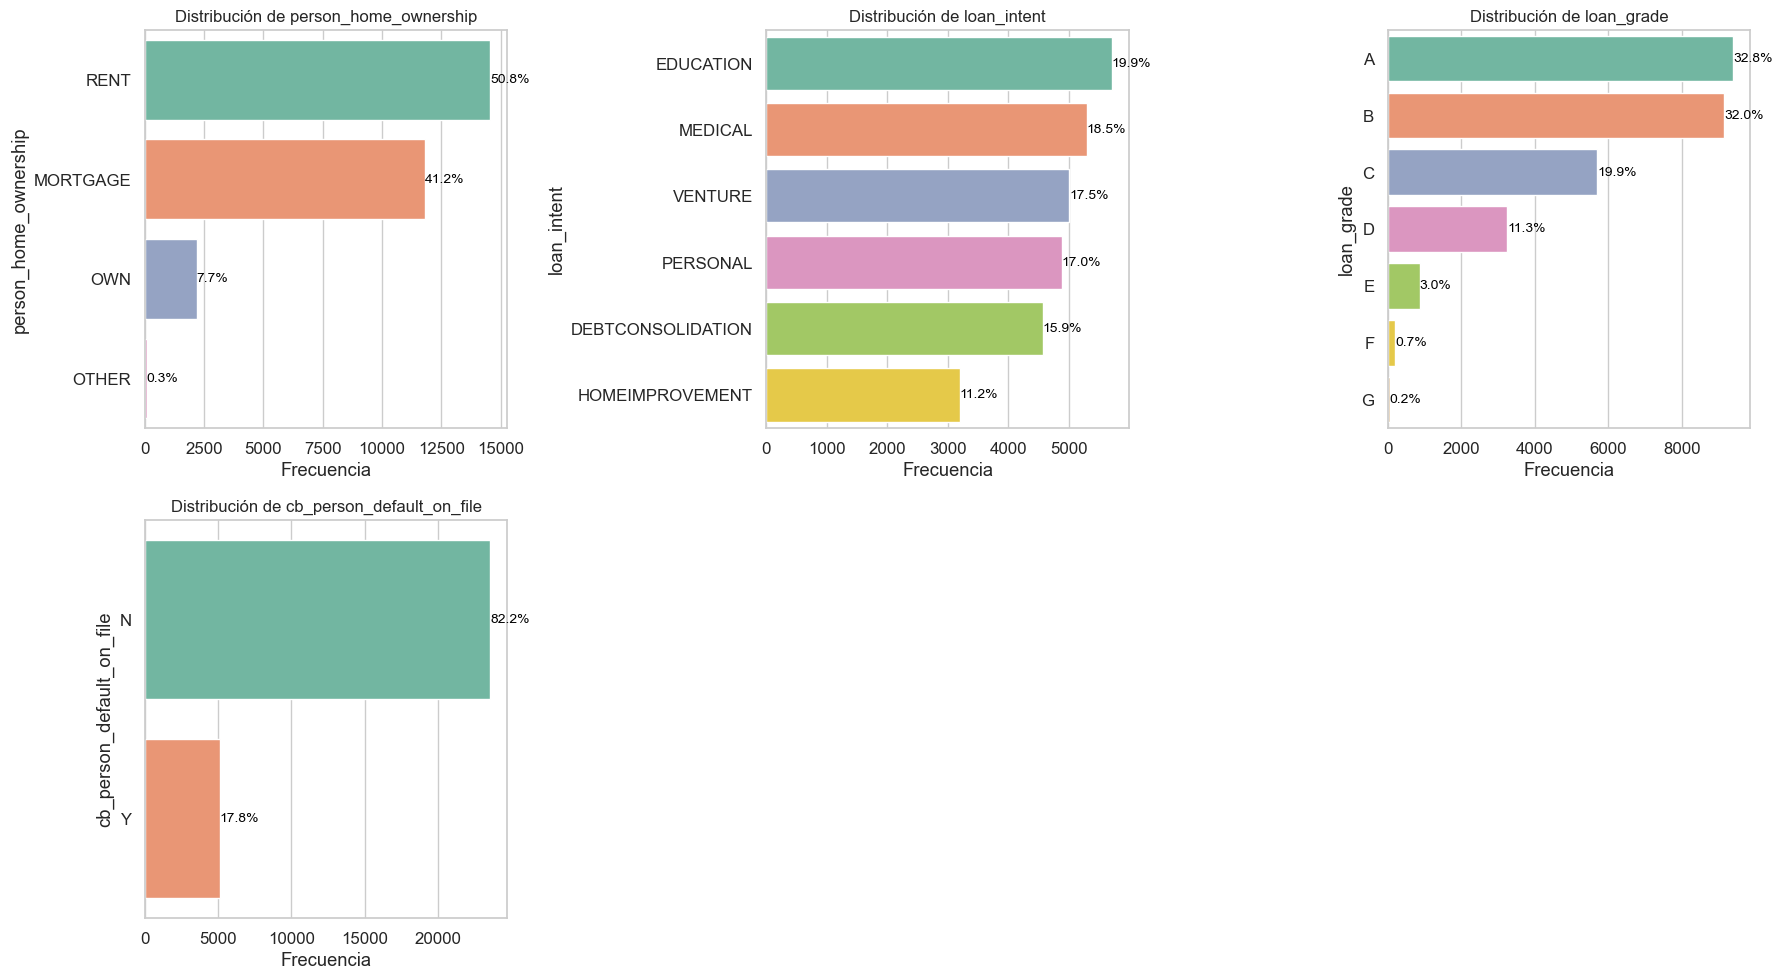

In [27]:
# 5. Análisis univariado

plt.figure(figsize=(6,4))
ax = sns.countplot(x='loan_status', data=df, palette='Set2')

plt.title("Distribución de la variable objetivo (loan_status)")
plt.xlabel("Estado del préstamo (0=Solvente, 1=Riesgo)")
plt.ylabel("Número de clientes")

total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    label = f"{count:,} ({percentage:.1f}%)"
    ax.annotate(label, 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

# Distribuciones de variables numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
n_num = len(num_cols)
rows_num = math.ceil(n_num / 3)

fig, axes = plt.subplots(rows_num, 3, figsize=(18, 5 * rows_num))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, color='teal', ax=axes[i])
    axes[i].set_title(f"Distribución de {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Distribuciones de variables categóricas
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
n_cat = len(cat_cols)
rows_cat = math.ceil(n_cat / 3)

fig, axes = plt.subplots(rows_cat, 3, figsize=(18, 5 * rows_cat))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2', ax=axes[i])
    total = len(df)
    for p in ax.patches:
        count = int(p.get_width())
        percentage = 100 * count / total
        ax.annotate(f"{percentage:.1f}%", 
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='black')
    axes[i].set_title(f"Distribución de {col}", fontsize=12)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Frecuencia")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

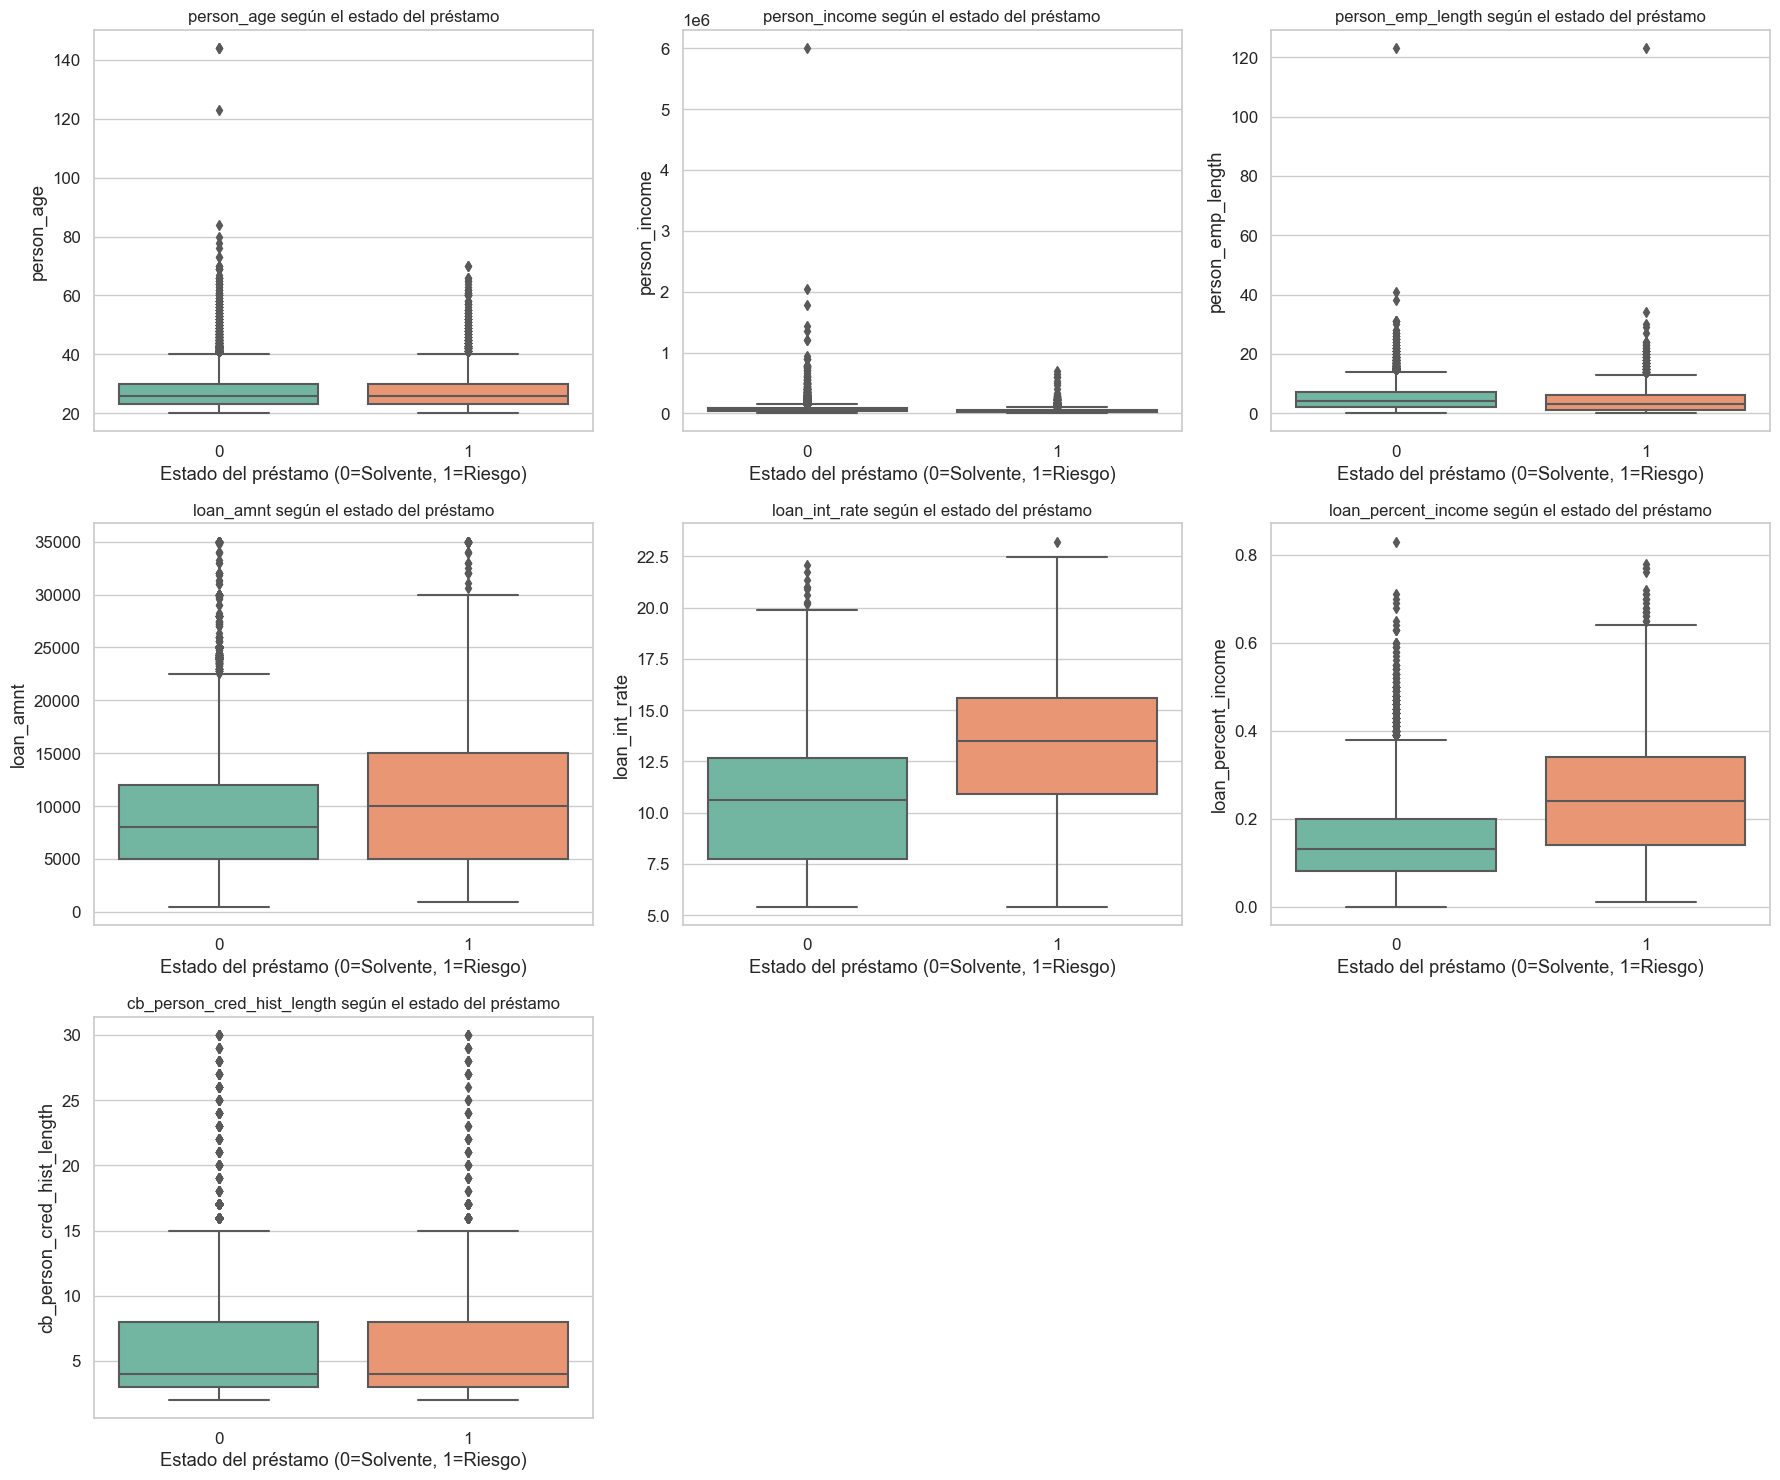

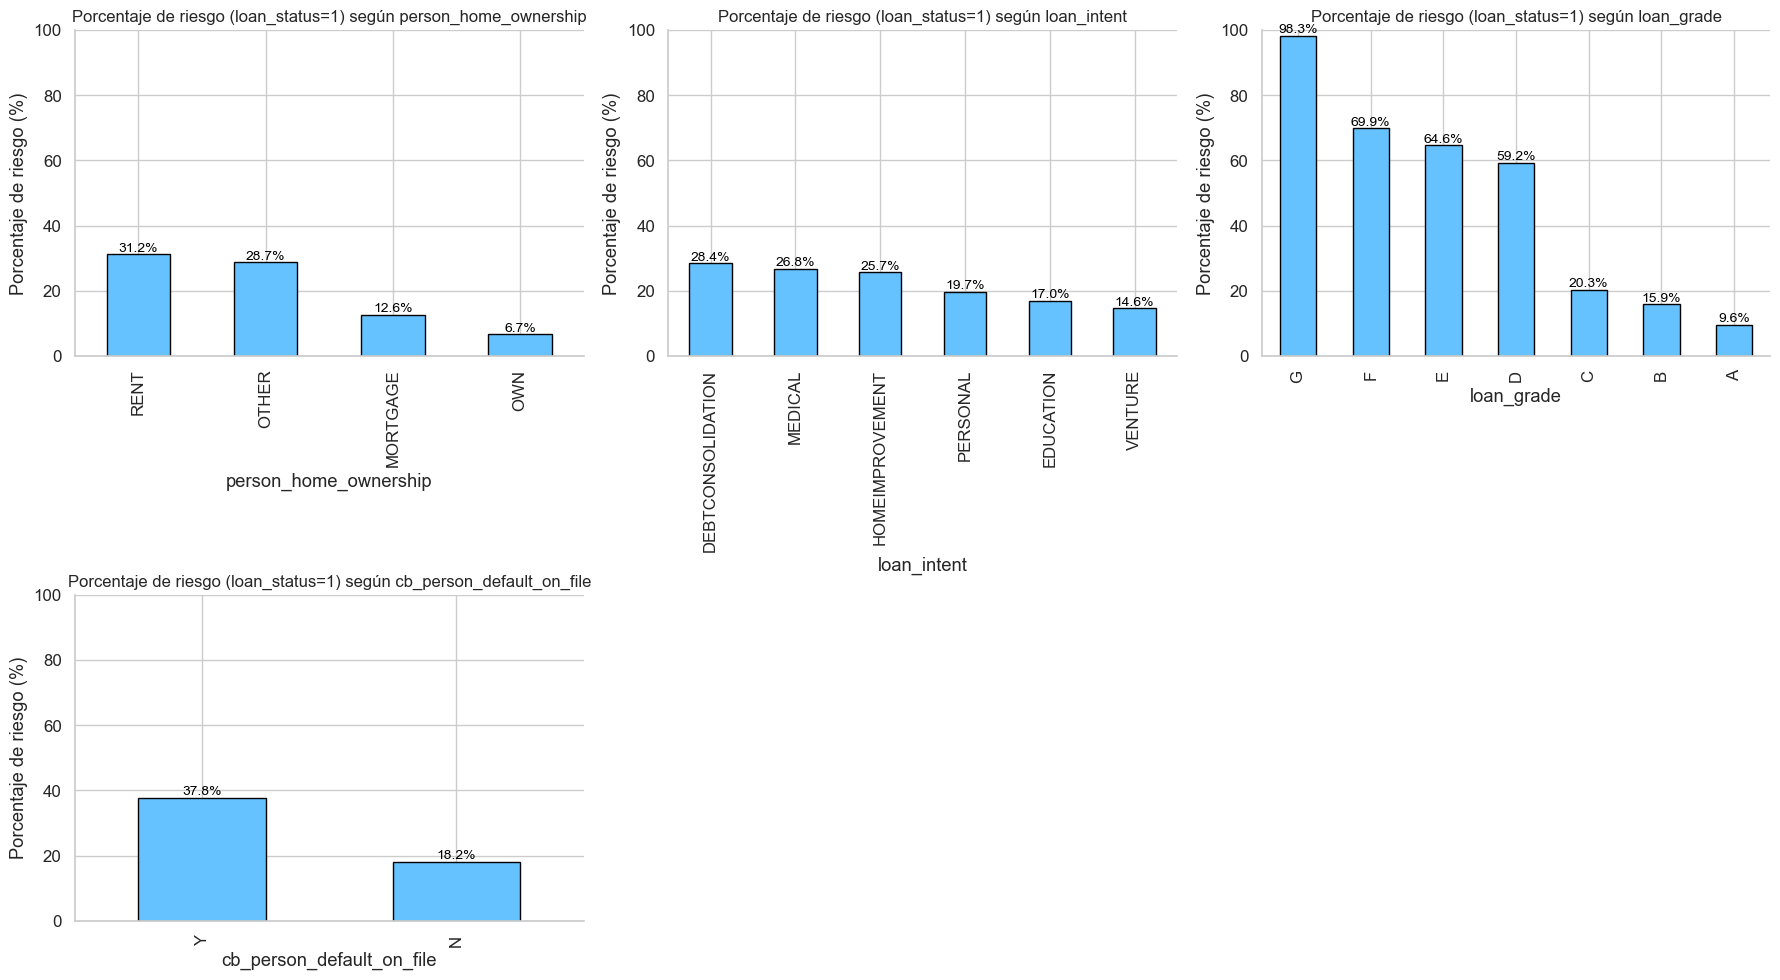

In [29]:
# 6. Análisis bivariado

# Relación entre variables numéricas y la variable objetivo
num_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'loan_status']
n_num = len(num_cols)
rows_num = math.ceil(n_num / 3)

fig, axes = plt.subplots(rows_num, 3, figsize=(18, 5 * rows_num))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x='loan_status', y=col, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f"{col} según el estado del préstamo", fontsize=12)
    axes[i].set_xlabel("Estado del préstamo (0=Solvente, 1=Riesgo)")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Relación entre variables categóricas y la variable objetivo
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
n_cat = len(cat_cols)
rows_cat = math.ceil(n_cat / 3)

fig, axes = plt.subplots(rows_cat, 3, figsize=(18, 5 * rows_cat))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    crosstab = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    risk_pct = crosstab[1] if 1 in crosstab.columns else pd.Series(0, index=crosstab.index)
    
    risk_pct.sort_values(ascending=False).plot(
        kind='bar', color='#66c2ff', edgecolor='black', ax=axes[i]
    )
    
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f"{height:.1f}%", 
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=10, color='black')
    
    axes[i].set_title(f"Porcentaje de riesgo (loan_status=1) según {col}", fontsize=12)
    axes[i].set_ylabel("Porcentaje de riesgo (%)")
    axes[i].set_xlabel(col)
    axes[i].set_ylim(0, 100)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


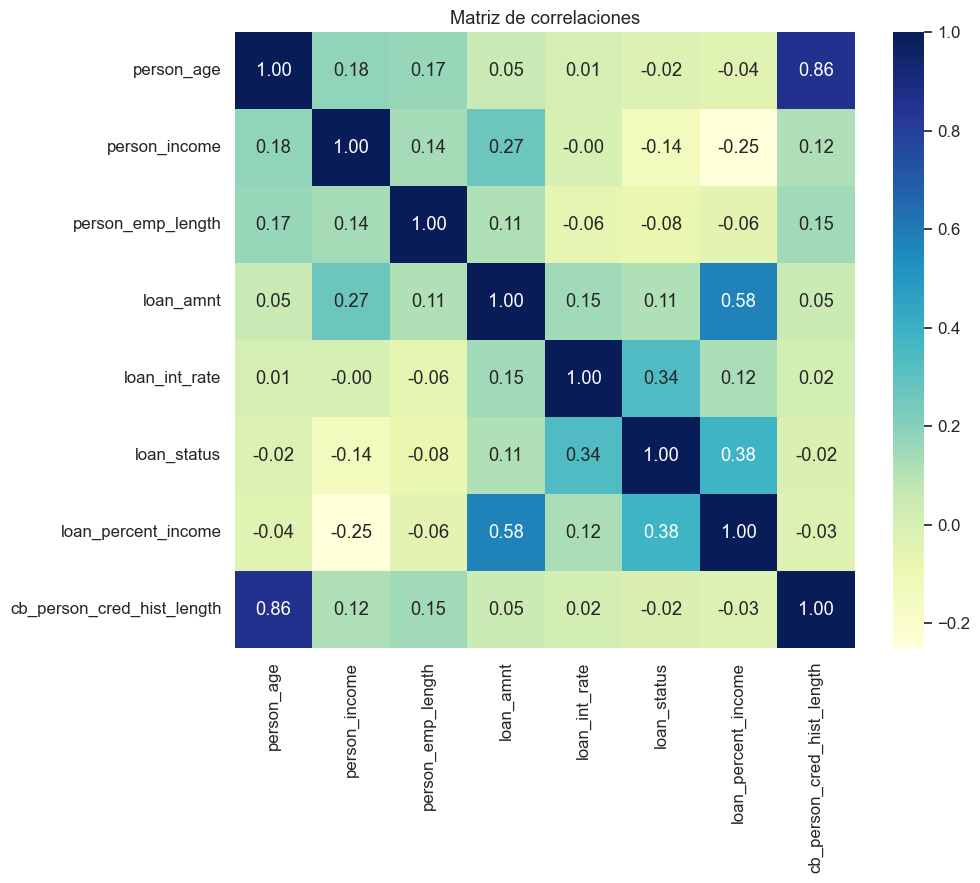

In [19]:
# 7. Matriz de correlaciones
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

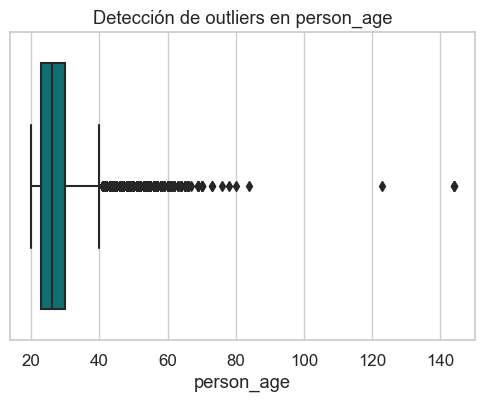

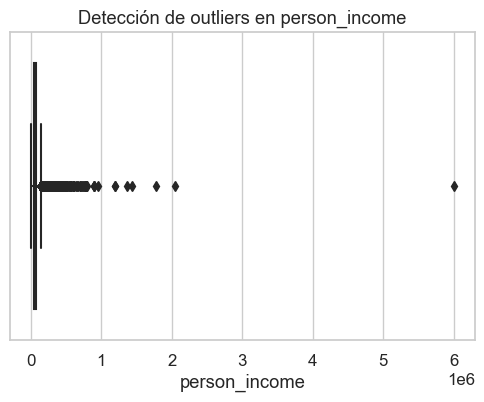

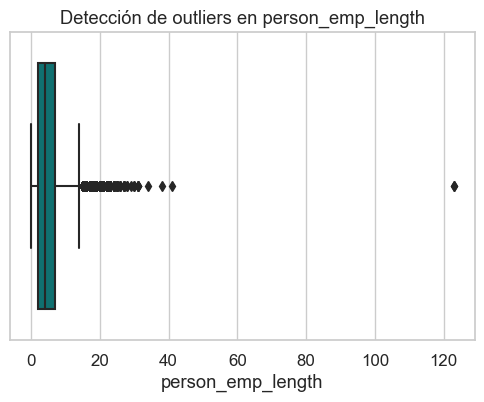

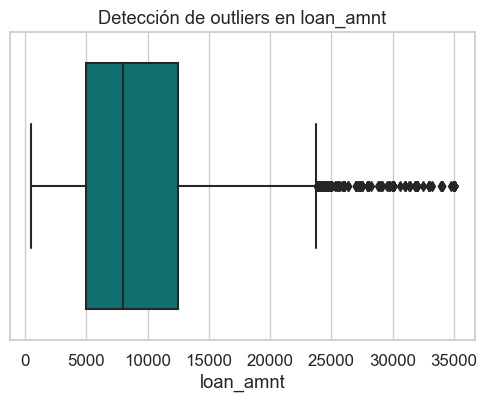

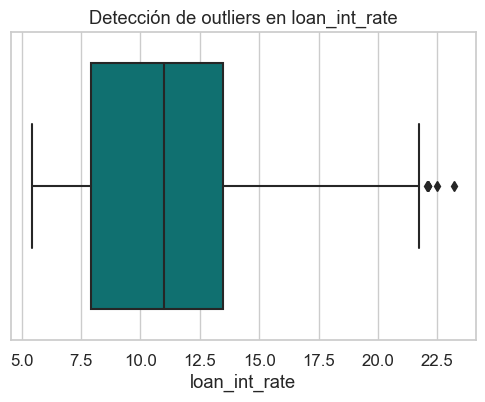

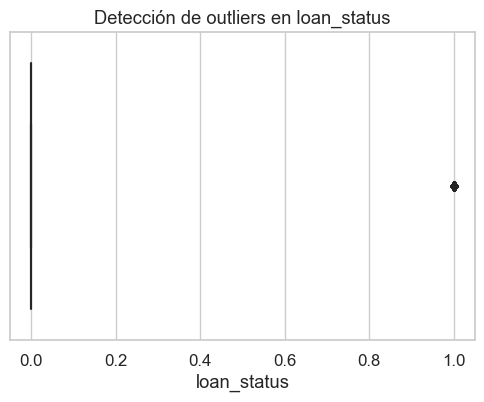

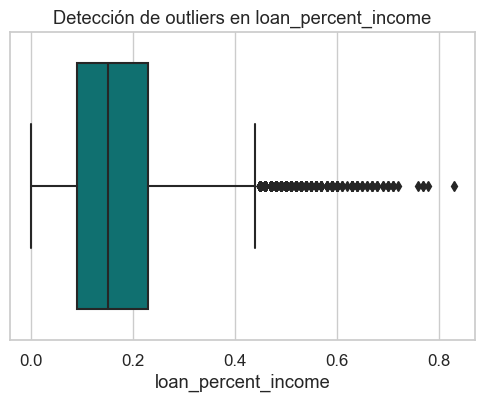

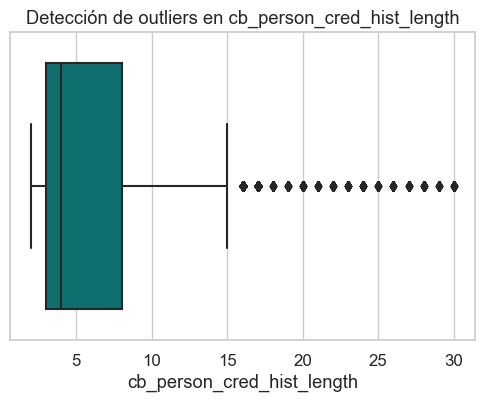

In [20]:
# 8. Detección de outliers

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='teal')
    plt.title(f"Detección de outliers en {col}")
    plt.show()